In [ ]:
# RUN ONLY IF IN COLAB
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# RUN ONLY IF IN COLAB
folder_path = '/content/drive/My Drive/data'

In [ ]:

# file_path = folder_path + '/Callibrator.txt'

# with open(file_path, 'r') as file:
#     content = file.read()
#     print(content)

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(folder_path) # RUN ONLY IF IN COLAB

# data = tf.keras.utils.image_dataset_from_directory('data') # RUN ON LOCAL

Found 24959 files belonging to 4 classes.


In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
batch = data.as_numpy_iterator().next()


In [ ]:
# 0 Hentai, 1 Neutral 2 Porn, 3: Sexy

# WARNING: THIS WILL OUTPUT IMAGES
fig, ax = plt.subplots(ncols=20, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [ ]:
len(data)

780

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (256, 256, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow import keras

# callbacks = myCallback() # RUN THIS ONLY IF YOU KNOW THE MAX ACCURACY THE MODEL CAN ACHIEVE

model = keras.Sequential()

model.add(pre_trained_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(4, activation='sigmoid'))

model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
585/585 [==============================] - 4297s 7s/step - loss: 0.7832 - accuracy: 0.7714 - val_loss: 0.3583 - val_accuracy: 0.8610
Epoch 2/10
585/585 [==============================] - 687s 1s/step - loss: 0.4066 - accuracy: 0.8542 - val_loss: 0.3757 - val_accuracy: 0.8640
Epoch 3/10
585/585 [==============================] - 669s 1s/step - loss: 0.3269 - accuracy: 0.8795 - val_loss: 0.3233 - val_accuracy: 0.8868
Epoch 4/10
585/585 [==============================] - 691s 1s/step - loss: 0.2707 - accuracy: 0.9013 - val_loss: 0.3246 - val_accuracy: 0.8886
Epoch 5/10
585/585 [==============================] - 693s 1s/step - loss: 0.2157 - accuracy: 0.9199 - val_loss: 0.3442 - val_accuracy: 0.8898
Epoch 6/10
585/585 [==============================] - 688s 1s/step - loss: 0.1793 - accuracy: 0.9342 - val_loss: 0.3457 - val_accuracy: 0.8932
Epoch 7/10
585/585 [==============================] - 692s 1s/step - loss: 0.1464 - accuracy: 0.9468 - val_loss: 0.4466 - val_accuracy: 0.888

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/My Drive/models/imageclassifier.h5')


In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

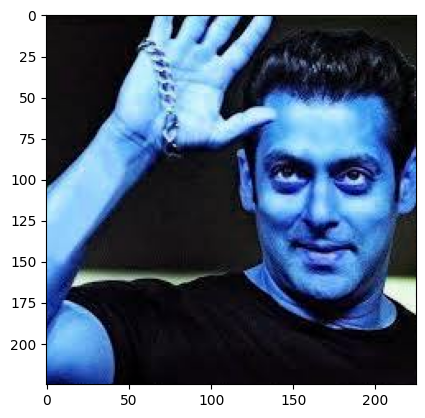

In [ ]:
image = cv2.imread('salman.jpg')

plt.imshow(image)

In [ ]:
image = cv2.imread("shahrukh khan.png")
resize = tf.image.resize(image, (256,256))

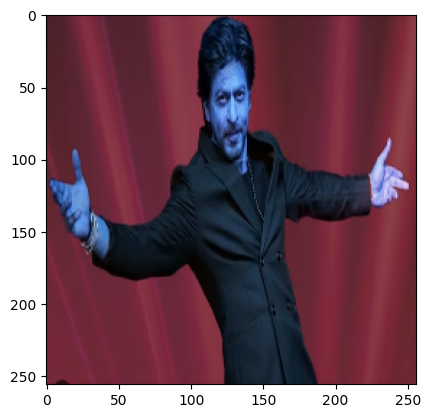

In [ ]:
plt.imshow(resize.numpy().astype(int))

In [ ]:
classes = ['Hentai', 'Neutral', 'Porn', 'Sexy']

In [ ]:
highest_index = np.argmax(new_model.predict(np.expand_dims(resize/255, 0)))

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(highest_index)
classes[highest_index]

1


'Neutral'

In [ ]:
model.predict(np.expand_dims(batch[0][2]/255, 0))

NameError: ignored

In [ ]:
plt.imshow(batch[0][2])

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/My Drive/models/imageclassifier.h5')

In [ ]:
  new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


array([[2.7197388e-05, 9.9990594e-01, 5.1057839e-01, 8.1929136e-03]],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow import keras
new_model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
hist = new_model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
624/624 [==============================] - 3838s 6s/step - loss: 0.2083 - accuracy: 0.9433 - val_loss: 0.1338 - val_accuracy: 0.9621
Epoch 2/15
624/624 [==============================] - 667s 1s/step - loss: 0.1474 - accuracy: 0.9551 - val_loss: 0.1459 - val_accuracy: 0.9639
Epoch 3/15
624/624 [==============================] - 693s 1s/step - loss: 0.1079 - accuracy: 0.9659 - val_loss: 0.1512 - val_accuracy: 0.9569
Epoch 4/15
624/624 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9746

In [ ]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','new_model.h5'))


In [ ]:
import cv2
import imutils

# Initializing the HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Reading the Image
image = cv2.imread('image.jpg')

# Resizing the Image
image = imutils.resize(image, width=min(400, image.shape[1]))

# Detecting all the regions in the Image that have pedestrians inside
regions, _ = hog.detectMultiScale(image, winStride=(4, 4), padding=(4, 4), scale=1.05)

# Check if any regions are detected (True if at least one region is detected, False otherwise)
person_detected = len(regions) > 0

# Print the result
print("Person detected:", person_detected)


Person detected: True


DisabledFunctionError: ignored